___
# _Climate Analysis and Exploration_
___

In [35]:
# Dependencies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

style.use('dark_background')

#style.use('fivethirtyeight')

# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy import create_engine, func,inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

___
### _Method-1: Retrieve the tables using  'Pandas read_sql'_
___

In [2]:
# Create an engine and connection to the database

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

connection = engine.connect()

In [3]:
# Print all table names in database

print(engine.table_names())

['measurement', 'station']


In [41]:
# Retrieve the data from 'measurement' table

Measurement_df = pd.read_sql('select * from measurement', connection)

Measurement_df.set_index('id', drop = True)

Measurement_df.head(10)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [42]:
# Retrieve the data from 'station' table

Station_df = pd.read_sql('select * from station', connection)

Station_df.set_index('id',drop = True)

Station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


___
### _Method-2: Retrieve the Tables using 'Inspect'_
___

In [6]:
# Use the Inspector to explore the database and print the table names

inspector = inspect(engine)

inspector.get_table_names()

['measurement', 'station']

In [7]:
# Use Inspector to print the names and types of columns in 'measurement' table

measurement_columns = inspector.get_columns('measurement')

print(f"The columns in 'measurement' table are:\n")
for mc in measurement_columns:
    print(mc['name'], mc['type'])

# Use Inspector to print the names and types of columns in 'station' table

station_columns = inspector.get_columns('station')

print(f"\nThe columns in 'station' table are:\n")
for sc in station_columns:
    print(sc['name'], sc["type"])

The columns in 'measurement' table are:

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

The columns in 'station' table are:

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Print the data in 'measurement' table

measurement = engine.execute('select * from measurement').fetchall()


In [9]:
# Print the data in 'station' table

station = engine.execute('select * from Station').fetchall()

station

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

___
### _Method-3:  Reflect the Tables into SQLAlchemy ORM_
___

In [10]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Reflect an existing database into a new model

Base = automap_base()

# Reflect the tables

Base.prepare(engine, reflect=True)

In [11]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to measurement table

Measurement = Base.classes.measurement
Measurement

sqlalchemy.ext.automap.measurement

In [13]:
# Save references to station table

Station = Base.classes.station
Station

sqlalchemy.ext.automap.station

In [14]:
# Create a session (link) from Python to the DB

session = Session(engine)

___
# _Precipitation Analysis_
___


### _Design a query to find the date of last data point_
___

In [15]:
# Import datetime and timedelta

from datetime import datetime,timedelta

# Design a query to find the date of last data point

date_query, = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'The date_query result is {date_query} ---> Type {type(date_query)}')

# Using strptime() to convert latest date from sring to datetype

latest_date = datetime.strptime(date_query,"%Y-%m-%d").date()
print(f'\nThe latest date is {latest_date}       ---> Type {type(latest_date)}')


# Calculate the date 1 year ago from the latest data in the database

Year_Ago_Date = latest_date - timedelta(days=365)
print(f'\nThe Year ago date is {Year_Ago_Date}     ---> Type {type(Year_Ago_Date)}')


The date_query result is 2017-08-23 ---> Type <class 'str'>

The latest date is 2017-08-23       ---> Type <class 'datetime.date'>

The Year ago date is 2016-08-23     ---> Type <class 'datetime.date'>


___
### _Design a query to retrieve precipitation data for last 12 months_
___

In [16]:
# Perform a query to retrieve the date and precipitation scores

prcp_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Year_Ago_Date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(prcp_query, columns =['Date','Precipitation'])


# Set the 'Date' column as index

prcp_df = prcp_df.set_index('Date')

# Sort the dataframe by date

prcp_df = prcp_df.sort_index()

prcp_df.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


___
### _Plot the precipitation data_
___

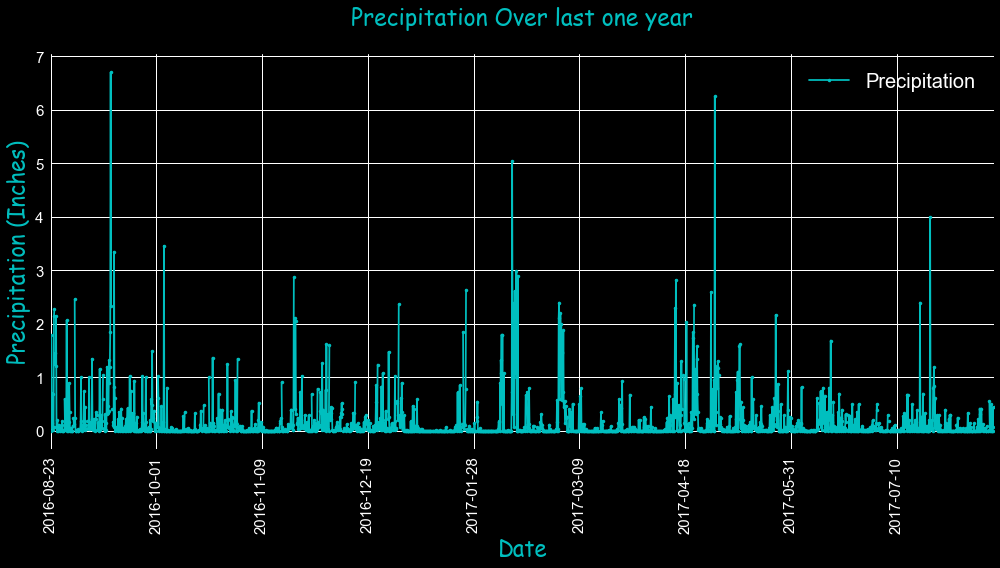

<Figure size 432x288 with 0 Axes>

In [36]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(kind = "line",
             figsize = (14,8),
             marker = '.',
             color = 'c',
             fontsize = 15,
             rot = 'vertical')

# Incorporate other graph properties

plt.title("Precipitation Over last one year", color = 'c', fontname='Comic Sans MS', fontsize = 23, pad = 30)

plt.ylabel("Precipitation (Inches)", color = 'c', fontname='Comic Sans MS', fontsize = 22)

plt.xlabel("Date", color = 'c', fontname='Comic Sans MS', fontsize = 22)

plt.legend(prop={'size': 20})

plt.tight_layout()

plt.show()

plt.savefig('Images/Precipitation.png')

___
### _Summary statistics for the precipitation data_
___


In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


___
# _<font color = E50FB4>Station Analysis<font>_
___

### _Design a query to calculate the total number of stations_
___

In [20]:
# Design a query to show how many stations are available in this dataset?

station_count, = session.query(func.count(Station.station)).first()

print(f'There are {station_count} stations in this dataset.\n')

# Design a query to list the stations names

station_names = session.query(Station.name).all()

print(f'The station names are:\n')

for row in station_names:
    print(row[0])

There are 9 stations in this dataset.

The station names are:

WAIKIKI 717.2, HI US
KANEOHE 838.1, HI US
KUALOA RANCH HEADQUARTERS 886.9, HI US
PEARL CITY, HI US
UPPER WAHIAWA 874.3, HI US
WAIMANALO EXPERIMENTAL FARM, HI US
WAIHEE 837.5, HI US
HONOLULU OBSERVATORY 702.2, HI US
MANOA LYON ARBO 785.2, HI US


___
### _Design a query to find the most active station (Station with most observations)_
___

In [39]:
# Design a query to find the stations and observation counts in descending order.

station_query_desc = session.query(Measurement.station, Station.name, func.count(Measurement.station)).\
                     filter(Measurement.station == Station.station).\
                     group_by(Measurement.station).\
                     order_by(func.count().desc()).\
                     all()

# List all the stations and the counts in descending order

station_query_desc_df = pd.DataFrame(station_query_desc, columns = ["Station_ID","Station_name","tobs_count"])

station_query_desc_df

,Station_ID,Station_name,tobs_count
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [22]:
# Print the station with highest number of observations

most_active_station_id = station_query_desc[0][0]
most_active_station_name = station_query_desc[0][1]

print(f'\nThe station with highest number of observations is {most_active_station_name}\n')

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station

stats_query = session.query(func.min(Measurement.tobs),
                            func.max(Measurement.tobs),
                            func.avg(Measurement.tobs)).\
              filter(Measurement.station == most_active_station_id).all()

print(f'The lowest temperature recorded: {stats_query[0][0]}')
print(f'The highest temperature recorded: {stats_query[0][1]}')
print(f'The average temperature recorded: {round(stats_query[0][2],2)}')


The station with highest number of observations is WAIHEE 837.5, HI US

The lowest temperature recorded: 54.0
The highest temperature recorded: 85.0
The average temperature recorded: 71.66


___
### _Design a query to retrieve temperature observation data(TOBS) for the last 12 months_
___

In [38]:
# Query the last 12 months of TOBS for the most active station

tobs_query = session.query(Measurement.date, Measurement.tobs).\
             filter(Measurement.station == most_active_station_id).\
             filter(Measurement.date >= Year_Ago_Date).\
             all()         

# Save the query results as a Pandas DataFrame

tobs_df = pd.DataFrame(tobs_query, columns =['Date','Temperature'])


# Set the 'Date' column as index & Sort the DataFrame by date

tobs_df = tobs_df.set_index('Date').sort_index()

tobs_df.head(15)


,Temperature
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
2016-08-29,78.0
2016-08-30,77.0
2016-08-31,78.0


___
### _Plot the results as a histogram with bins=12_
___

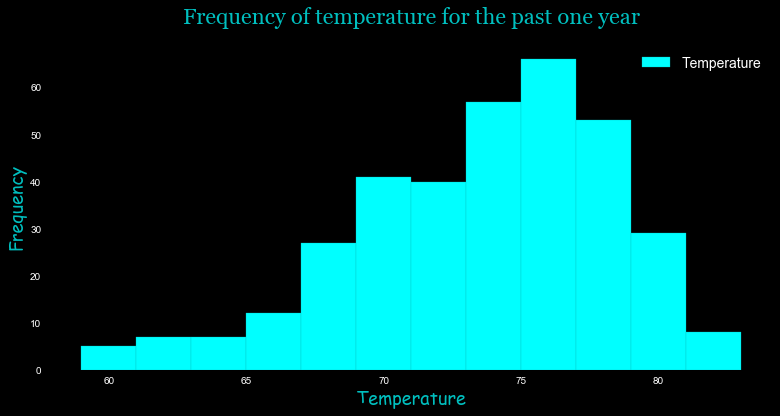

<Figure size 432x288 with 0 Axes>

In [37]:
tobs_df.plot(kind='hist',
             bins = 12,
             figsize = (13,6),
             color='cyan',
             edgecolor = 'c'
            )

# Incorporate other graph properties

plt.title("Frequency of temperature for the past one year",
          fontname='Georgia',
          fontsize = 22,
          color = 'c',
          pad = 20
         )

plt.ylabel("Frequency",color = 'c', fontname='Comic Sans MS', fontsize = 18)

plt.xlabel("Temperature", color = 'c',fontname='Comic Sans MS', fontsize = 18)

plt.legend(prop={'size': 14})
plt.grid()
plt.show()

plt.savefig('Images/Station-histogram.png')

___
# _Bonus Challenge Assignment_
___

In [43]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    
    stats_query = session.query(func.min(Measurement.tobs),
                                func.avg(Measurement.tobs),
                                func.max(Measurement.tobs)).\
                  filter(Measurement.date >= start_date).\
                  filter(Measurement.date <= end_date).\
                  all()

    return stats_query

# function usage example

print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [44]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

start_date = '2016-12-25'
end_date = '2017-01-01'

prev_year_start = datetime.strptime(start_date,"%Y-%m-%d").date() - timedelta(days=365)

prev_year_end = datetime.strptime(end_date,"%Y-%m-%d").date() - timedelta(days=365)

print(f'Temp_stats for dates between {prev_year_start} & {prev_year_end}:')

Min_temp, Avg_temp, Max_temp = calc_temps(prev_year_start, prev_year_end)[0]

print(f'\nMin Temperature: {Min_temp} \nAvg Temperature: {round(Avg_temp,1)} \nMax Temperature: {Max_temp}')

Temp_stats for dates between 2015-12-26 & 2016-01-02:

Min Temperature: 62.0 
Avg Temperature: 71.8 
Max Temperature: 77.0


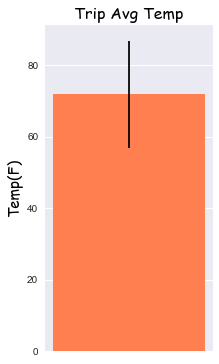

<Figure size 576x396 with 0 Axes>

In [45]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

style.use('seaborn')

plt.figure(figsize = (3,6))

plt.bar(1, Avg_temp, yerr = (Max_temp - Min_temp), width = 0.1, color = 'coral', ecolor = "k")

plt.xticks([])

plt.title("Trip Avg Temp", fontname='Comic Sans MS', fontsize = 16, color = 'k')
plt.ylabel("Temp(F)", fontname='Comic Sans MS', fontsize = 15, color = 'k')

plt.show()

plt.savefig('Images/Temperature.png')

In [46]:
# Calculate the total amount of rainfall per weather station for your trip dates 
# using the previous year's matching dates.
# Sort this in descending order by precipitation amount 
# and list the station, name, latitude, longitude, and elevation

sel = [Station.station, 
       Station.name, 
       Station.latitude,
       Station.longitude,
       Station.elevation,
       func.sum(Measurement.prcp)
      ]


rainfall_query = session.query(*sel).\
                 filter(Measurement.station >= prev_year_start).\
                 filter(Measurement.date <= prev_year_end).\
                 group_by(Station.name).\
                 order_by(func.sum(Measurement.prcp).desc()).\
                 all()

for row in rainfall_query:
    print(row)


('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 2326.1899999999614)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 2326.1899999999614)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 2326.1899999999614)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 2326.1899999999614)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 2326.1899999999614)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 2326.1899999999614)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 2326.1899999999614)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 2326.1899999999614)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 2326.1899999999614)


In [47]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    
    sel = [func.min(Measurement.tobs),
           func.avg(Measurement.tobs),
           func.max(Measurement.tobs)]
    
    
    query = session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
    return query

# function usage example

daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [48]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

trip_start_date = '2017-12-25'
trip_end_date = '2017-12-31'

# Use the start and end date to create a range of dates

trip_dates = pd.date_range(start = trip_start_date, end = trip_end_date, freq = 'D')

print(f'\nTrip dates:\n\n{trip_dates}')

# Strip off the year and save a list of %m-%d strings

trip_month_day = trip_dates.strftime("%m-%d")

print(f'\nTrip Month-Day List: \n\n{trip_month_day}')


# Loop through the list of %m-%d strings and calculate the normals for each date

normals = []

for row in trip_month_day:
    normals.append(*daily_normals(row))
    print(*daily_normals(row))


Trip dates:

DatetimeIndex(['2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='D')

Trip Month-Day List: 

Index(['12-25', '12-26', '12-27', '12-28', '12-29', '12-30', '12-31'], dtype='object')
(60.0, 71.75, 79.0)
(63.0, 71.44680851063829, 77.0)
(62.0, 71.91666666666667, 79.0)
(62.0, 70.52083333333333, 77.0)
(57.0, 70.29166666666667, 78.0)
(63.0, 69.86363636363636, 76.0)
(56.0, 68.27906976744185, 77.0)


In [50]:
# Load the previous query results into a Pandas DataFrame

df = pd.DataFrame(normals, columns=["Min Temp","Avg Temp","Max Temp"])

# Add the `trip_dates` range as the `date` index

df['Date'] = trip_dates

df = df.set_index("Date")

df

,Min Temp,Avg Temp,Max Temp
Date,,,
2017-12-25,60.0,71.750000,79.0
2017-12-26,63.0,71.446809,77.0
2017-12-27,62.0,71.916667,79.0
2017-12-28,62.0,70.520833,77.0
2017-12-29,57.0,70.291667,78.0
2017-12-30,63.0,69.863636,76.0
2017-12-31,56.0,68.279070,77.0


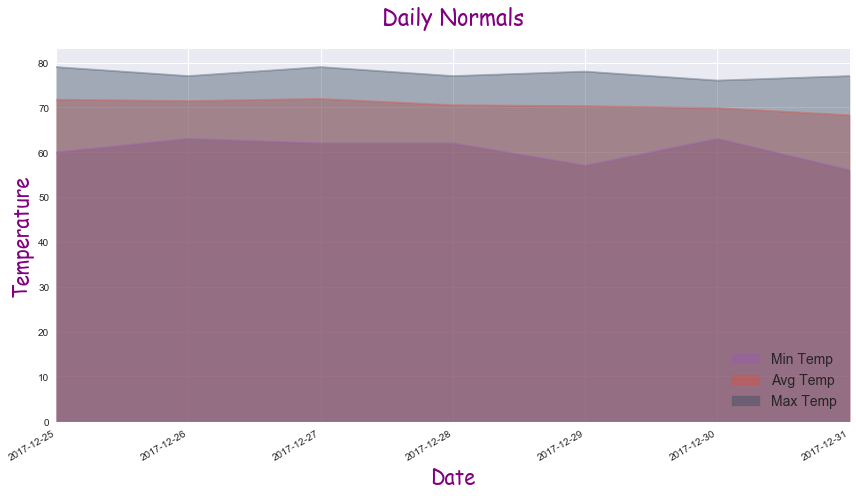

<Figure size 576x396 with 0 Axes>

In [51]:
# Plot the daily normals as an area plot with `stacked=False`

#import seaborn as sns
#pal = sns.color_palette("Set1")

pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]

df.plot.area(figsize = (12,7), stacked = False, x_compat=True, color = pal, alpha=.4) 

plt.title("Daily Normals",color = 'purple', fontname='Comic Sans MS', fontsize = 22, pad = 25)

plt.ylabel("Temperature",color = 'purple', fontname='Comic Sans MS', fontsize = 20)

plt.xlabel("Date", color = 'purple',fontname='Comic Sans MS', fontsize = 20)


plt.legend(prop={'size': 14},loc = 'lower right',facecolor = 'k')

plt.tight_layout()

plt.show()

plt.savefig("Images/DailyNormals.png")

In [47]:
date_query = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(date_query, type(date_query))

('2017-08-23',) <class 'sqlalchemy.util._collections.result'>


In [48]:
date_query,= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(date_query, type(date_query))


2017-08-23 <class 'str'>
